<hr>

# <center> Building Machine learning Model For Desktop Computers

<hr>


In [68]:
# EDA
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
import datetime
# Data Preprocesing
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
# Modeling
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor # boosting technique
from sklearn.ensemble import StackingRegressor #Stacking regressor
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor 
from sklearn.svm import LinearSVR 
#ensemble regression
from sklearn.ensemble import BaggingRegressor  #bagging technique
from sklearn.model_selection import GridSearchCV

from datasist.structdata import detect_outliers
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
import joblib
# display all the columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
# Plots settings
# Standard figure size for all
sns.set(rc={'figure.figsize': [15, 7]}, font_scale=1.2)
sns.set_style("whitegrid")
warnings.filterwarnings('ignore')


In [69]:
def Get_label_enco(df,cat_cols,num_cols,bool_cols):
    # for Reverse Label Encoder Features to dicts for using in the Future
    for i in df[cat_cols].columns:
        la=LabelEncoder()
        la.fit(df[i].values.flatten())
        globals()[i] = dict(zip(df[i].values.flatten(),la.transform(df[i].values.flatten()) ))
    global df_data_model
    label_enc = LabelEncoder()
    df[cat_cols] =  df[cat_cols].apply(label_enc.fit_transform)
    df_data_model = pd.concat([df[cat_cols] , df[num_cols],df[bool_cols]] , axis=1)
    ############################################
    return df_data_model.sample(5)

In [70]:
def Get_Missing_Values(df):
    global new_table
    Missing_Values_sum = df.isnull().sum()
    percent_ = Missing_Values_sum * 100 / len(df)
    new_table = pd.concat([Missing_Values_sum,percent_] , axis=1)
    new_table = new_table.rename(columns={0:"Missing Values" , 1: "percent"})
    missing40 = list(new_table[new_table["percent"]> 50].index)
    new_table = new_table[new_table["Missing Values"] !=0].sort_values("percent",ascending=False).round(2)
    print("DataFrame has " , df.shape[1] , " columns")
    print("DataFrame has " , new_table.shape[0] , "Columns with missing values")
    return new_table

In [71]:
def Classifiy_data(df):
    print("new_Data shape ", df.shape)
# categorical Columns
    global categorical_columns
    categorical_columns = [
        column for column in df.columns if df[column].dtypes == "O"]
    global Bool_columns
    Bool_columns = [
        column for column in df.columns if df[column].dtypes == "bool"]
    global numerical_columns
    numerical_columns = [
        column for column in df.columns if df[column].dtypes != "O"]
    #print("Number of numeric Columns: ", len(numerical_columns))
    #print(numerical_columns)
    #print("_____________________________________")
    #print("Number of categorical Columns: ", len(categorical_columns))
    #print(categorical_columns)
    #print("_____________________________________")
    #print("Number of Bool Columns: ", len(Bool_columns))
    #print(categorical_columns)

In [72]:
pd.set_option('max_colwidth', 20)
Desktop = pd.read_csv("CSV/Desktop.csv", low_memory=False)
Desktop.drop(Desktop.filter(regex="Unname"), axis=1,
               inplace=True)  # Remove Unnamed Column
Desktop.drop(["Title_Product","Model","Series","Product_Price_US","Product_Price_SR","Shipping_Price","Product_URL","Product_Images"] ,axis=1,inplace=True)
Desktop.sample(2)

,Brand,Color,Date_First_Year,Product_Type,Product_Style,Product_Usage,Weight,CPU_Brand,CPU_Model,CPU_Series,CPU_Gen,Cores,CPU_Speed,Core_Name,GPU_Brand,GPU_Model,Video_Memory,Is_SSD,Storage_HDD,Storage_SSD,SSD_Type,Memory_capacity,Memory_Type,Memory_Speed,OS_Corporation,OS_Version,Screen_Size,X_res,Y_res,Res_Type,Touchscreen,WideScreen,Screen_Tec,WebCam,AC_Power,Battery_Cell,Power_Supply_W,Bluetooth,Bluetooth_V,Ethernet,WiFi_Ver,Has_Thunderbolt,Type_C_Count,Type_A_Count,USB_C_Ver,Total_Price,PPI
2107,VELZTORM,White,2021.0,Desktop Computers,NaN,Entertainment,5.960204,Intel,Core,i7,10th,NaN,2.9,NaN,Intel,Radeon,6.0,True,1024.0,512.0,NaN,16.0,DDR4,2400.0,Microsoft,Windows 10 Home,0.0,0.0,0.0,No Screen,False,False,No Screen,No WebCam,NaN,0.0,750.0,True,5.1,True,Wifi 5,False,9.0,7.0,USB C 3.2,16112.38,NaN
4536,INTEL,Black,2022.0,Desktop Computers,Mini,NaN,8.400531,Intel,Core,i3,6th,NaN,2.4,NaN,Intel,HD,12.0,True,0.0,64.0,NVMe,32.0,DDR3,2400.0,Microsoft,Windows 11 Pro,0.0,0.0,0.0,No Screen,True,False,No Screen,No WebCam,NaN,0.0,500.0,True,5.0,True,Wifi 6,False,2.0,2.0,USB C 3.2,1608.65,NaN


In [73]:
# For Resolve ValueError: Input contains infinity or a value too large for dtype('float64'). Convert long float to short
Desktop["PPI"]= Desktop["PPI"].replace([np.inf, -np.inf], np.nan)
Desktop.describe()

,Date_First_Year,Weight,Cores,CPU_Speed,Video_Memory,Storage_HDD,Storage_SSD,Memory_capacity,Memory_Speed,Screen_Size,X_res,Y_res,AC_Power,Battery_Cell,Power_Supply_W,Bluetooth_V,Type_C_Count,Type_A_Count,Total_Price,PPI
count,5548.000000,3837.000000,2368.000000,5548.000000,4824.000000,5548.000000,5548.000000,5546.000000,4212.000000,5548.000000,5548.000000,5548.000000,50.000000,5286.000000,4942.000000,3966.000000,5329.000000,5053.000000,5548.000000,903.000000
mean,2021.007931,10.326384,3.274493,3.194508,6.848466,1126.700433,841.610671,21.530472,2472.404796,4.037635,475.632300,267.640231,115.200000,0.003784,625.077499,4.836006,3.784387,3.332278,9757.672091,126.016611
std,1.406266,7.014367,1.312508,0.582118,3.142818,1489.558401,915.638950,22.134735,594.440535,9.277391,1360.366124,765.302650,22.564194,0.113368,297.723451,0.475604,3.346631,2.770344,6248.145156,108.449845
min,2015.000000,0.548847,2.000000,0.000000,1.000000,0.000000,0.000000,2.000000,1066.000000,0.000000,0.000000,0.000000,45.000000,0.000000,45.000000,2.100000,0.000000,0.000000,277.140000,0.000000
25%,2021.000000,5.955668,2.000000,2.900000,6.000000,0.000000,256.000000,8.000000,2400.000000,0.000000,0.000000,0.000000,120.000000,0.000000,310.000000,4.200000,2.000000,1.000000,4785.150000,0.000000
50%,2022.000000,6.023707,4.000000,3.200000,6.000000,1024.000000,512.000000,16.000000,2400.000000,0.000000,0.000000,0.000000,120.000000,0.000000,750.000000,5.100000,2.000000,2.000000,8530.670000,100.000000
75%,2022.000000,15.013907,4.000000,3.700000,8.000000,2048.000000,1024.000000,24.000000,2666.000000,0.000000,0.000000,0.000000,120.000000,0.000000,800.000000,5.200000,8.000000,7.000000,13450.370000,218.000000
max,2022.000000,28.576319,8.000000,5.200000,24.000000,6144.000000,4096.000000,256.000000,5200.000000,27.000000,5120.000000,2880.000000,180.000000,4.000000,1400.000000,5.300000,9.000000,9.000000,33279.810000,1377.000000


In [74]:
Classifiy_data(Desktop)

new_Data shape  (5548, 47)


In [75]:
def Fill_Missing(df):
        imputer_SI = SimpleImputer(strategy='most_frequent', missing_values=np.nan)
        df[categorical_columns] = imputer_SI.fit_transform(df[categorical_columns])
        ## fill numerical missing data using KNNImputer
        impute_knn = KNNImputer(n_neighbors=5)
        df[numerical_columns] = impute_knn.fit_transform(df[numerical_columns])
        print("Done fill missing values")
Fill_Missing(Desktop)

Done fill missing values


In [76]:
#Desktop.to_csv("../Deployment/CSV/Desktop.csv")

In [77]:
Desktop_model = Get_label_enco(Desktop,categorical_columns,numerical_columns,Bool_columns)
Desktop_model.sample(2)

,Brand,Color,Product_Type,Product_Style,Product_Usage,CPU_Brand,CPU_Model,CPU_Series,CPU_Gen,Core_Name,GPU_Brand,GPU_Model,SSD_Type,Memory_Type,OS_Corporation,OS_Version,Res_Type,Screen_Tec,WebCam,WiFi_Ver,USB_C_Ver,Date_First_Year,Weight,Cores,CPU_Speed,Video_Memory,Is_SSD,Storage_HDD,Storage_SSD,Memory_capacity,Memory_Speed,Screen_Size,X_res,Y_res,Touchscreen,WideScreen,AC_Power,Battery_Cell,Power_Supply_W,Bluetooth,Bluetooth_V,Ethernet,Has_Thunderbolt,Type_C_Count,Type_A_Count,Total_Price,PPI,Is_SSD,Touchscreen,WideScreen,Bluetooth,Ethernet,Has_Thunderbolt
61,9,8,0,0,2,2,3,6,0,2,2,1,0,2,2,4,3,0,0,2,3,2021.0,10.468912,3.6,2.9,6.0,1.0,1024.0,2048.0,16.0,2720.0,0.0,0.0,0.0,0.0,0.0,105.0,0.0,750.0,1.0,5.1,0.0,0.0,1.0,1.0,17803.14,35.0,1.0,0.0,0.0,1.0,0.0,0.0
607,9,8,0,0,2,2,3,7,1,2,2,1,1,2,2,5,3,0,0,2,3,2022.0,13.598699,2.8,3.7,12.0,1.0,1024.0,512.0,16.0,3200.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,750.0,1.0,5.1,0.0,0.0,9.0,7.0,9309.44,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [78]:
correlations = Desktop.corr()
correlations["Total_Price"].sort_values(ascending=False) 

Total_Price        1.000000
Brand              0.633214
Product_Usage      0.600629
Bluetooth_V        0.535972
Memory_Type        0.524121
CPU_Speed          0.489433
Storage_SSD        0.458788
Power_Supply_W     0.443455
Memory_Speed       0.329341
Date_First_Year    0.324680
USB_C_Ver          0.315392
Color              0.311052
Type_C_Count       0.297681
Type_A_Count       0.289224
GPU_Brand          0.260365
Bluetooth          0.193900
Storage_HDD        0.183956
Is_SSD             0.158635
OS_Corporation     0.142463
CPU_Gen            0.106589
PPI                0.101889
Res_Type           0.101621
WiFi_Ver           0.098132
Memory_capacity    0.066952
Core_Name          0.053065
CPU_Model          0.035994
Video_Memory       0.006854
GPU_Model         -0.010421
Has_Thunderbolt   -0.035951
OS_Version        -0.038668
X_res             -0.085214
Y_res             -0.085345
WideScreen        -0.097994
Battery_Cell      -0.103994
Cores             -0.108512
Weight            -0

<AxesSubplot:xlabel='Weight', ylabel='Density'>

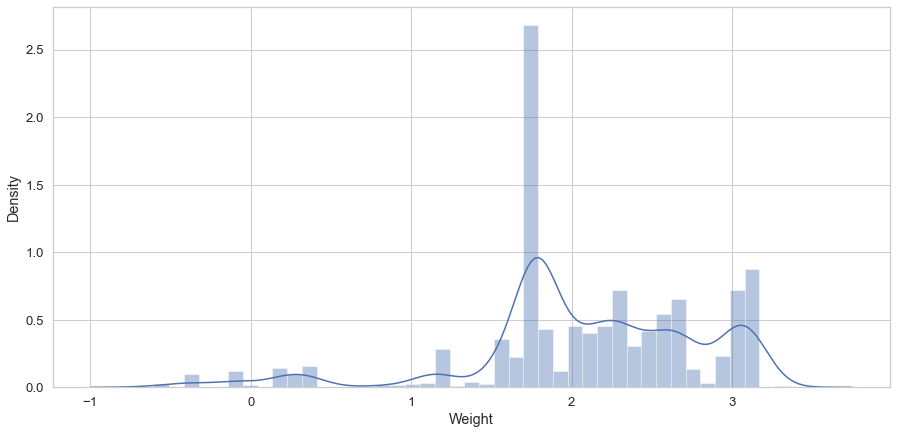

In [79]:
sns.distplot(np.log(Desktop['Weight']))

<AxesSubplot:xlabel='Weight', ylabel='Total_Price'>

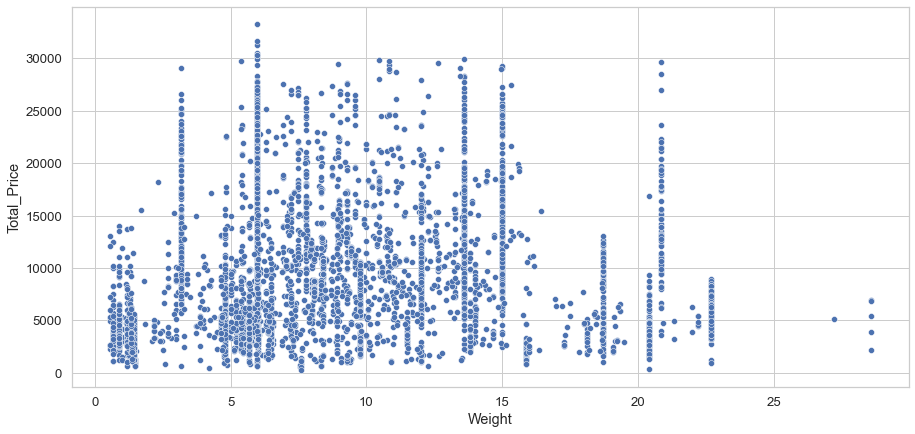

In [80]:
sns.scatterplot(Desktop['Weight'],Desktop['Total_Price'])

<AxesSubplot:xlabel='Total_Price', ylabel='Density'>

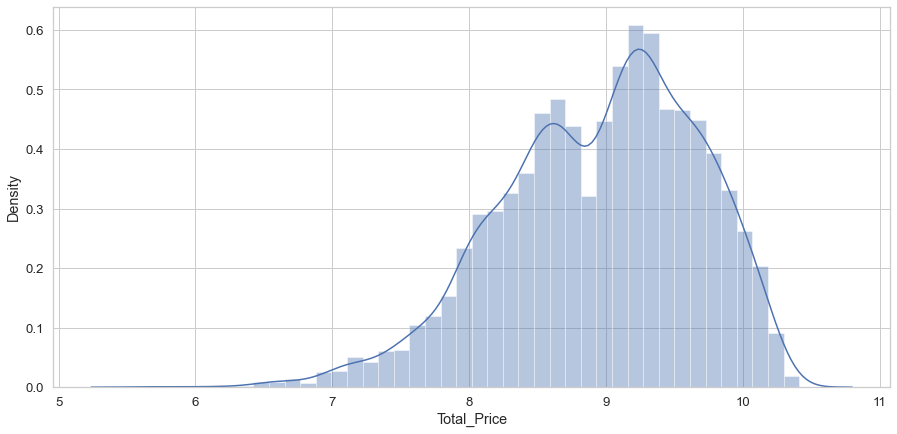

In [81]:
sns.distplot(np.log(Desktop['Total_Price']))

<AxesSubplot:xlabel='Total_Price', ylabel='Density'>

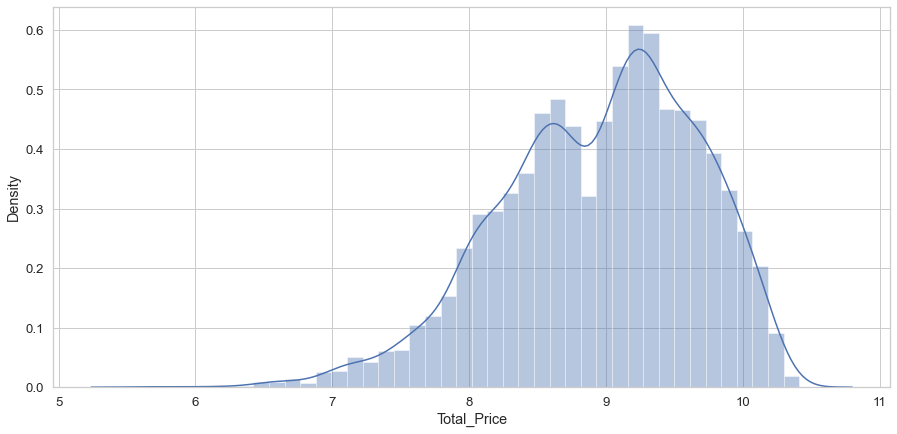

In [82]:
# so if we apply np.log to the Price col we get a gaussian distibution

sns.distplot(np.log(Desktop['Total_Price']))

# Standard processing and Training/Test set Split

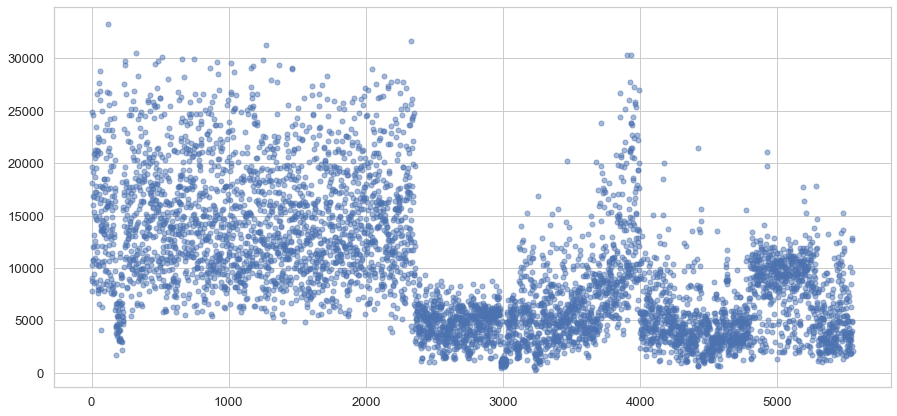

In [83]:
plt.plot(Desktop["Total_Price"], "bo", alpha=0.50, markersize=5)

In [84]:
Desktop_filtered = Desktop[Desktop["Total_Price"] < 30000]
Desktop_filtered.rename(columns = {'Cores':'CPU_Cores'}, inplace = True)

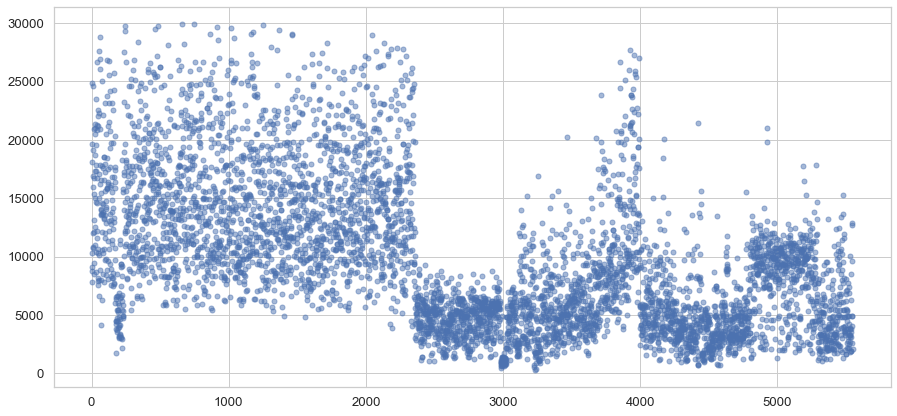

In [85]:
plt.plot(Desktop_filtered["Total_Price"], "bo", alpha=0.50, markersize=5)

In [86]:
X = Desktop_filtered.drop(["Total_Price"],axis=1)
Y = Desktop_filtered["Total_Price"]

In [101]:
X.columns

Index(['Brand', 'Color', 'Date_First_Year', 'Product_Type', 'Product_Style', 'Product_Usage', 'Weight', 'CPU_Brand', 'CPU_Model', 'CPU_Series', 'CPU_Gen', 'CPU_Cores', 'CPU_Speed', 'Core_Name', 'GPU_Brand', 'GPU_Model', 'Video_Memory', 'Is_SSD', 'Storage_HDD', 'Storage_SSD', 'SSD_Type', 'Memory_capacity', 'Memory_Type', 'Memory_Speed', 'OS_Corporation', 'OS_Version', 'Screen_Size', 'X_res', 'Y_res', 'Res_Type', 'Touchscreen', 'WideScreen', 'Screen_Tec', 'WebCam', 'AC_Power', 'Battery_Cell', 'Power_Supply_W', 'Bluetooth', 'Bluetooth_V', 'Ethernet', 'WiFi_Ver', 'Has_Thunderbolt', 'Type_C_Count', 'Type_A_Count', 'USB_C_Ver', 'PPI'], dtype='object')

# Standard processing and Training/Test set Split

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, Y ,test_size=0.30,random_state=40,shuffle=True)  #01 -40
# resort y_test, and using the same order sorting x
order = y_test.argsort(axis=0)
y_test = y_test.values[order]
X_test = X_test.values[order, :]
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
#################################################################################################################
# The Best hyper prameters 
estimators = [('Decision tree', DecisionTreeRegressor()),
('Random Forest', RandomForestRegressor()),
('SVR', LinearSVR(random_state=42))              
             ]
             
grid_params = {
    "kernel": ["rbf"],
    "gamma": [10 ** i for i in range(-2, 1)],
    "C": [3 ** i for i in range(4, 10)],
}

models = {
    "GBregressor":GradientBoostingRegressor(),
    "StackingRegressor": StackingRegressor(estimators=estimators,final_estimator=LinearRegression()),
    "Lasso ":LassoCV(),
    "Ridge":RidgeCV(),
    "KNN" : KNeighborsRegressor(),
    "DecisionTree" : DecisionTreeRegressor(random_state = 100),
    "RandomForest" : RandomForestRegressor(n_estimators = 100, random_state = 0),
    "XGB" : XGBRegressor(),
    "BaggingRegressor" : BaggingRegressor(n_estimators = 10,random_state = 0)

}
Results = {
    "Model":[],
    "Train Score":[],
    "Test Score":[],
}
##################################################################################################
####################################################################################################
# Create Dataframe with Test Data  Features and Predict and concatenat it 
# ## Prediction on the whole Dataset 
x_cols = X.columns
y_cols = ["Total_Price"]
Data_x = pd.DataFrame(X_test,columns=[x_cols])
Data_y = pd.DataFrame(y_test,columns=[y_cols])
Data = pd.concat([Data_y],axis=1)
##################################################################################################
for name, model in models.items():
    model.fit(X_train,y_train)
    train_s = model.score(X_train,y_train)
    test_s = model.score(X_test,y_test)
    y_pred = model.predict(X_test)
    accuracy = r2_score(y_test,y_pred)
    ############################################
    ############################################
    Results["Model"].append(name)
    Results["Train Score"].append(train_s)
    Results["Test Score"].append(test_s)
    Data[f"{name} {test_s,2}"] = pd.Series(y_pred)
    joblib.dump(model, f'Model/Desktop/Model_Desktop_{name}_Test_Acc_{test_s}.h5') # ## Save the Model
    joblib.dump(scaler, f'Model/Desktop/Scaler_Model_Desktop_{name}.h5') # ## Save the Model
scores = pd.DataFrame(Results)
#################################################################################################
scores


,Model,Train Score,Test Score
0,GBregressor,0.939797,0.936229
1,StackingRegressor,0.994720,0.979280
2,Lasso,0.745535,0.689865
3,Ridge,0.747778,0.698535
4,KNN,0.845008,0.679346
5,DecisionTree,0.999918,0.973239
6,RandomForest,0.994344,0.981108
7,XGB,0.990669,0.968679
8,BaggingRegressor,0.991549,0.977174


In [88]:
Data.sample(1)

,Total_Price,"GBregressor (0.936228540065016, 2)","StackingRegressor (0.9792796226861249, 2)","Lasso (0.6898654458801109, 2)","Ridge (0.6985346737687774, 2)","KNN (0.6793461821624879, 2)","DecisionTree (0.9732385840557493, 2)","RandomForest (0.9811082513729688, 2)","XGB (0.9686787119901517, 2)","BaggingRegressor (0.9771742617657575, 2)"
36,12281.6,11301.05995,12333.202024,10023.481729,10190.494769,11586.08,12695.6,12391.693333,12238.068359,12564.653333


In [89]:
X.columns

Index(['Brand', 'Color', 'Date_First_Year', 'Product_Type', 'Product_Style', 'Product_Usage', 'Weight', 'CPU_Brand', 'CPU_Model', 'CPU_Series', 'CPU_Gen', 'CPU_Cores', 'CPU_Speed', 'Core_Name', 'GPU_Brand', 'GPU_Model', 'Video_Memory', 'Is_SSD', 'Storage_HDD', 'Storage_SSD', 'SSD_Type', 'Memory_capacity', 'Memory_Type', 'Memory_Speed', 'OS_Corporation', 'OS_Version', 'Screen_Size', 'X_res', 'Y_res', 'Res_Type', 'Touchscreen', 'WideScreen', 'Screen_Tec', 'WebCam', 'AC_Power', 'Battery_Cell', 'Power_Supply_W', 'Bluetooth', 'Bluetooth_V', 'Ethernet', 'WiFi_Ver', 'Has_Thunderbolt', 'Type_C_Count', 'Type_A_Count', 'USB_C_Ver', 'PPI'], dtype='object')

In [90]:
a = X.sample(1).values.tolist()
Model_Desktop = joblib.load("../Deployment/Model/Model_Desktop_RandomForest_Test_Acc_0.9811082513729688.h5")
Model_Desktop_Scaller = joblib.load("../Deployment/Model/Scaler_Model_Desktop_RandomForest.h5")
predict = round(Model_Desktop.predict(Model_Desktop_Scaller.transform(a))[0],2)
predict

6268.83

Text(0.5, 1.0, 'Train Score')

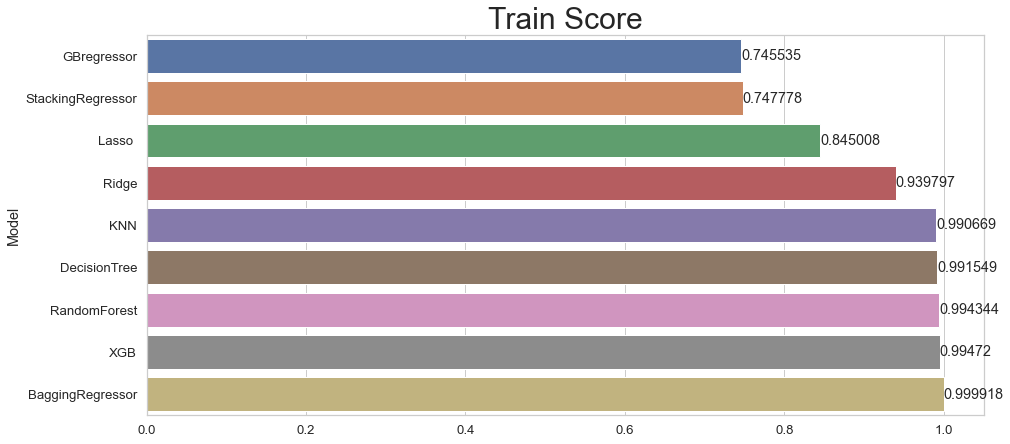

In [91]:
ax = sns.barplot(y=scores['Model'], x=sorted(scores['Train Score']))
for container in ax.containers:
    ax.bar_label(container)
plt.title("Train Score",fontsize=30)

Text(0.5, 1.0, 'Test Score')

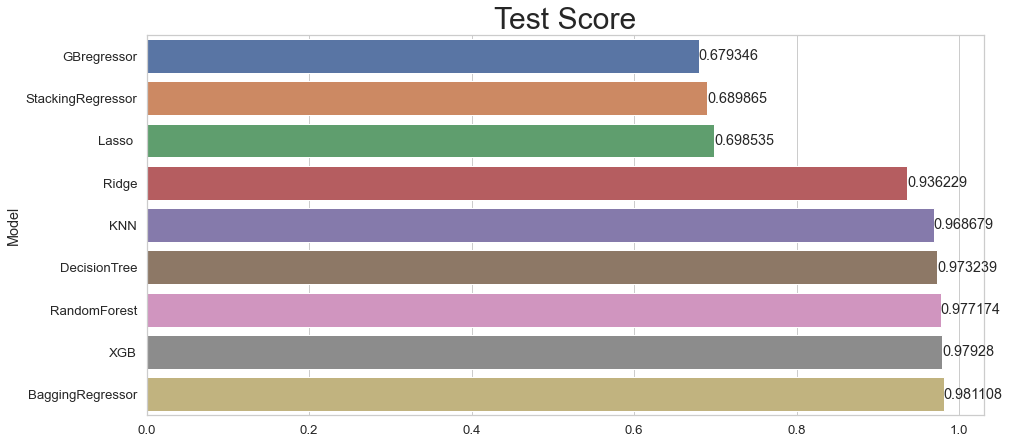

In [92]:
ax = sns.barplot(y=scores['Model'], x=sorted(scores['Test Score']))
for container in ax.containers:
    ax.bar_label(container)
plt.title("Test Score",fontsize=30)

In [93]:
Data.loc[:, "Total_Price":].sample()

,Total_Price,"GBregressor (0.936228540065016, 2)","StackingRegressor (0.9792796226861249, 2)","Lasso (0.6898654458801109, 2)","Ridge (0.6985346737687774, 2)","KNN (0.6793461821624879, 2)","DecisionTree (0.9732385840557493, 2)","RandomForest (0.9811082513729688, 2)","XGB (0.9686787119901517, 2)","BaggingRegressor (0.9771742617657575, 2)"
35,11597.05,9217.723377,9767.011004,11810.982005,11925.000251,12267.404,11580.29,10077.2649,9264.439453,9908.293


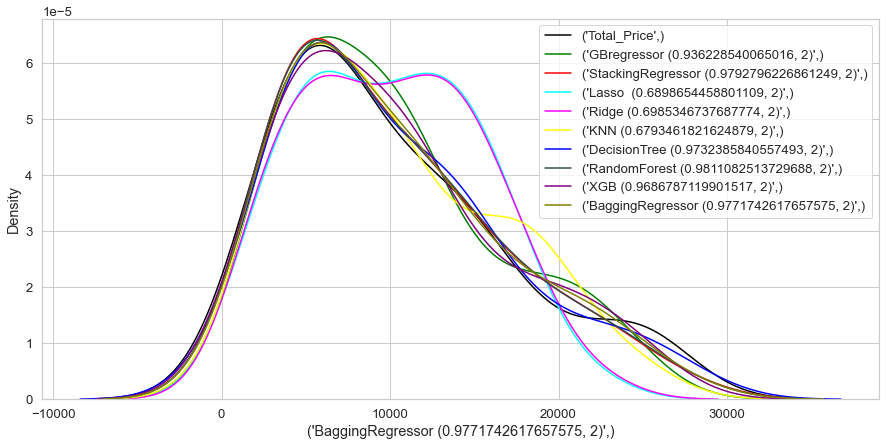

In [94]:
plot_list = Data.loc[:, "Total_Price":].columns
model_dict = {}
colors = ["black","green","red","cyan","magenta","yellow","blue","darkslategray","purple","olive","yellow"]
for i,col in enumerate(plot_list):
        model_dict[col] = colors[i]

for key,color in model_dict.items():
            sns.distplot(Data[key],hist=False,color=color,label=key)
plt.legend()
plt.show()

<hr>

# i'll choose RandomForest Model  that Test Accuracy 98%

<hr>

# Reverse Label Encoder To Dict

In [95]:
Var_Names = []
for var in Desktop_filtered[categorical_columns]:
    Var_Names.append(locals()[var])
for index,var in enumerate(Desktop_filtered[categorical_columns].columns.tolist()):
    (pd.DataFrame.from_dict(data=Var_Names[index], orient='index')
    .to_csv(f'Reverse_Label/Desktop/Desktop_Reverse_{var}.csv'))

In [96]:
# Reading All CSV File into Variables and Create Dataframe as a Read CSV File.
from os import listdir
from os.path import isfile, join
path = "Reverse_Label/Desktop"
CSV_Files = sorted([f for f in listdir(path) if isfile(join(path, f))])
Var_Names_ = []
for i in CSV_Files:
    var = i.replace("(", "").replace(")", "").replace(".csv","").replace(" ", "_")
    locals()[var] = pd.read_csv(path+"/"+i)
    locals()[var] = locals()[var].to_numpy().tolist()
    locals()[var] = { k[0]: k[1] for k in locals()[var] }
##############################################################################

In [97]:
Brand

{'ASUS': 2,
 'VELZTORM': 9,
 'ACER': 0,
 'HP': 4,
 'MSI': 8,
 'DELL': 3,
 'LENOVO': 6,
 'INTEL': 5,
 'MICROSOFT': 7,
 'APPLE': 1}

In [98]:
Desktop_filtered.sample()

,Brand,Color,Date_First_Year,Product_Type,Product_Style,Product_Usage,Weight,CPU_Brand,CPU_Model,CPU_Series,CPU_Gen,CPU_Cores,CPU_Speed,Core_Name,GPU_Brand,GPU_Model,Video_Memory,Is_SSD,Storage_HDD,Storage_SSD,SSD_Type,Memory_capacity,Memory_Type,Memory_Speed,OS_Corporation,OS_Version,Screen_Size,X_res,Y_res,Res_Type,Touchscreen,WideScreen,Screen_Tec,WebCam,AC_Power,Battery_Cell,Power_Supply_W,Bluetooth,Bluetooth_V,Ethernet,WiFi_Ver,Has_Thunderbolt,Type_C_Count,Type_A_Count,USB_C_Ver,Total_Price,PPI
1620,9,2,2021.0,0,0,2,13.249433,0,6,2,10,3.2,3.8,2,2,1,8.0,1.0,2048.0,512.0,0,8.0,2,3200.0,2,3,0.0,0.0,0.0,3,0.0,0.0,0,0,105.0,0.0,750.0,1.0,5.2,1.0,2,0.0,8.0,2.0,3,15215.47,16.4


In [99]:
Desktop_filtered["Memory_capacity"].value_counts()

16.0     2532
8.0      1282
32.0      862
64.0      341
4.0       268
24.0       84
128.0      66
96.0       32
48.0       21
12.0       18
2.0        16
256.0      11
6.0         2
10.0        2
192.0       2
20.8        1
21.6        1
Name: Memory_capacity, dtype: int64

In [100]:
Memory_capacity

NameError: name 'Memory_capacity' is not defined

In [ ]:
GPU_Brand

{'Intel': 1, 'NVIDIA': 2, 'Apple': 0}

In [ ]:
GPU_Model   ["Graphics" , "HD","UHD"]   ["GeForce","Radeon","Quadro","Iris"]

{'Graphics': 2,
 'GeForce': 1,
 'Radeon': 7,
 'HD': 3,
 'Quadro': 6,
 'UHD': 8,
 'Iris': 4,
 'Apple': 0,
 'M1': 5}